In [1]:
import pandas as pd
import warnings
from dateutil.parser import parse
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


warnings.filterwarnings('ignore')

In [2]:
df_as = pd.read_csv("../data/original/ActivitySummary.csv")
df_as.shape

(556, 8)

In [3]:
import datetime

# only relevant features
df_as_filtered = df_as[['dateComponents','activeEnergyBurned','appleExerciseTime','appleStandHours']]
       
# convert to time
for (index, value) in df_as_filtered.iterrows():
    correct_time = datetime.datetime.strptime(value['dateComponents'], '%Y-%m-%d')
    df_as_filtered.at[index, 'creationDate'] = correct_time
    df_as_filtered.at[index, 'appleExerciseTime'] = value['appleExerciseTime'] * 60
    

df_as_final = df_as_filtered[['creationDate', 'activeEnergyBurned', 'appleExerciseTime', 'appleStandHours']]

df_as_final.head()

,creationDate,activeEnergyBurned,appleExerciseTime,appleStandHours
0,2018-01-14,0.000,0,0
1,2018-01-15,0.000,0,0
2,2018-01-16,356.837,1200,13
3,2018-01-17,409.932,1260,17
4,2018-01-18,369.308,600,15


In [4]:
df_copy = df_as_final.set_index('creationDate')
df_copy.head()

,activeEnergyBurned,appleExerciseTime,appleStandHours
creationDate,,,
2018-01-14,0.000,0,0
2018-01-15,0.000,0,0
2018-01-16,356.837,1200,13
2018-01-17,409.932,1260,17
2018-01-18,369.308,600,15


In [5]:
df_hrv = pd.read_csv("../data/original/HeartRateVariabilitySDNN.csv")
df_hrv.shape

(932, 9)

In [6]:
df_hrv_filtered = df_hrv[['creationDate', 'value']]

# df_hrv_copy = df_hrv_filtered.set_index('creationDate')
# df_hrv_copy.head()

# convert from string to datetime
df_hrv_filtered['creationDate'] = pd.to_datetime(df_hrv_filtered['creationDate'])
# mean per day
df_hrv_final = df_hrv_filtered.groupby(df_hrv_filtered['creationDate'].dt.date).mean()

df_hrv_filtered.head()



,creationDate,value
0,2018-01-16 09:50:18+02:00,32.3970
1,2018-01-16 09:55:05+02:00,45.1124
2,2018-01-16 14:52:15+02:00,27.3781
3,2018-01-16 21:24:11+02:00,41.4216
4,2018-01-18 09:08:50+02:00,41.0526


In [7]:
df_mindful = pd.read_csv("../data/original/MindfulSession.csv")
df_mindful.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Headspace,8769,NaN,MindfulSession,NaN,2018-01-14 11:16:40 +0200,2018-01-14 11:15:45 +0200,2018-01-14 11:16:05 +0200,NaN
1,Headspace,8769,NaN,MindfulSession,NaN,2018-01-14 11:16:40 +0200,2018-01-14 11:16:06 +0200,2018-01-14 11:16:11 +0200,NaN
2,Headspace,8769,NaN,MindfulSession,NaN,2018-01-14 11:16:40 +0200,2018-01-14 11:16:12 +0200,2018-01-14 11:16:14 +0200,NaN
3,Headspace,8769,NaN,MindfulSession,NaN,2018-01-14 11:16:40 +0200,2018-01-14 11:16:15 +0200,2018-01-14 11:16:18 +0200,NaN
4,Headspace,8769,NaN,MindfulSession,NaN,2018-01-14 11:16:40 +0200,2018-01-14 11:16:20 +0200,2018-01-14 11:16:20 +0200,NaN


In [8]:
# removed redundant features
df_mindful_filtered = df_mindful[['creationDate','startDate', 'endDate']]
df_mindful_filtered.head()

# calculated duration between startDate and endDate
df_mindful_filtered['duration'] = [time for 
                               time in 
                               pd.to_datetime(df_mindful['endDate']) - pd.to_datetime(df_mindful['startDate'])]

df_mindful_final = df_mindful_filtered[['creationDate', 'duration']]

# converted duration to seconds format
df_mindful_filtered['seconds'] = df_mindful_filtered['duration'].dt.total_seconds()
df_mindfulness = df_mindful_filtered[['creationDate', 'seconds']]

# grouped days by seconds meditated
df_final_mindful = df_mindfulness.groupby(pd.to_datetime(df_mindfulness['creationDate']).dt.date).sum()
df_final_mindful.head()



,seconds
creationDate,
2018-01-14,1393.0
2018-01-16,689.0
2018-01-20,1382.0
2018-01-22,1792.0
2018-01-23,705.0


In [9]:
df_step = pd.read_csv("../data/original/StepCount.csv")
df_step.shape

(38408, 9)

In [10]:
df_step_filtered = df_step[['creationDate', 'value']]
df_step_filtered.head()

,creationDate,value
0,2018-01-13 00:37:45 +0200,12
1,2018-01-13 00:37:45 +0200,4
2,2018-01-13 01:39:00 +0200,77
3,2018-01-13 10:38:15 +0200,16
4,2018-01-13 15:42:21 +0200,13


In [11]:
# convert from string to datetime
df_step_filtered['creationDate'] = pd.to_datetime(df_step_filtered['creationDate'])
# sum total per day
df_step_final = df_step_filtered.groupby(df_step_filtered['creationDate'].dt.date).sum()

df_step_final.shape

# for (item, value) in df_step_final.iterrows():
#     print(value)
#     break


(626, 1)

In [12]:
for (index, row) in df_step_final.reset_index().iterrows():
    print(index)
    print(row)
    creationDate, value = row
    print(creationDate)
    print(value)
    break

0
creationDate    2018-01-13
value                 8337
Name: 0, dtype: object
2018-01-13
8337


In [13]:
df_flights_climbed = pd.read_csv("../data/original/FlightsClimbed.csv")
# df_flights_climbed.head()

In [14]:
df_flights_climbed_filtered = df_flights_climbed[['creationDate', 'value']]
# df_flights_climbed_filtered.shape

In [15]:
time = df_flights_climbed_filtered['creationDate']
time = pd.to_datetime(time)

# df_flights_climbed_filtered.groupby(df_flights_climbed_filtered['creationDate'].dt.date).sum()

df_flights_final = df_flights_climbed_filtered.groupby(time.dt.date).sum()
df_flights_final.head()



# df_flights_climbed_filtered.head()
# DID:
# 1 - removed redundant columns
# 2 - sum per day of flights climbed

,value
creationDate,
2018-01-13,3
2018-01-14,2
2018-01-15,23
2018-01-16,9
2018-01-17,5


## Aggregate ActivitySummary with all activities

In [22]:
from tabulate import tabulate


results = pd.DataFrame()
# results['Date'] = df_step_final['creationDate']
results['Step Count'] = df_step_final['value']
results['Flights Climbed'] = df_flights_final['value']
results['Meditations (seconds)'] = df_final_mindful['seconds']
results['Active Energy Burned (kcal)'] = df_copy['activeEnergyBurned']
results['Exercise Time (seconds)'] = df_copy['appleExerciseTime']
results['Stand up number'] = df_copy['appleStandHours']
results['Heart Rate Variability (SDNN)'] = df_hrv_final['value']


# results = results.set_index('creationDate')

# print(tabulate(results.dropna().head(),tablefmt="pipe", headers="keys"))

results.dropna().corr()

# results.hist()
# results.to_csv('../data/summary_shaped.csv')

# for (index, row) in results.iterrows():
#     print(type(row['creationDate']))
#     print(pd.to_datetime('2018-01-01'))
#     break




,Step Count,Flights Climbed,Meditations (seconds),Active Energy Burned (kcal),Exercise Time (seconds),Stand up number,Heart Rate Variability (SDNN)
Step Count,1.000000,0.532171,-0.005208,0.461085,0.427208,0.010414,0.130443
Flights Climbed,0.532171,1.000000,-0.058417,0.393635,0.275498,0.201459,-0.022076
Meditations (seconds),-0.005208,-0.058417,1.000000,-0.220378,-0.019383,-0.288024,-0.014988
Active Energy Burned (kcal),0.461085,0.393635,-0.220378,1.000000,0.621549,0.698266,0.053830
Exercise Time (seconds),0.427208,0.275498,-0.019383,0.621549,1.000000,0.204715,-0.047198
Stand up number,0.010414,0.201459,-0.288024,0.698266,0.204715,1.000000,0.017890
Heart Rate Variability (SDNN),0.130443,-0.022076,-0.014988,0.053830,-0.047198,0.017890,1.000000


# Data set II

In [17]:
import seaborn as sns
from matplotlib import dates
import matplotlib.pyplot as plt
# sns.set(font_scale=5.5)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)

|       |   HRV (SDNN) |   Is at Work (binary) |   Is Above Mean Value |   Hour of Day |
|:------|-------------:|----------------------:|----------------------:|--------------:|
| count |    932       |            932        |            932        |     932       |
| mean  |     41.2493  |              0.43133  |              0.433476 |      14       |
| std   |     15.6852  |              0.495528 |              0.495821 |       5.30893 |
| min   |      8.21203 |              0        |              0        |       0       |
| 25%   |     30.8391  |              0        |              0        |      10       |
| 50%   |     38.8085  |              0        |              0        |      14       |
| 75%   |     49.5485  |              1        |              1        |      18       |
| max   |    173.526   |              1        |              1        |      23       |


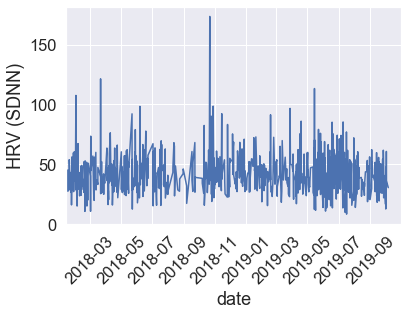

In [18]:
hrv_merged = pd.DataFrame()

def at_work(row):
    hour = pd.to_datetime(row['creationDate']).hour
    weekday = pd.to_datetime(row['creationDate']).isoweekday()
    
    if((hour >= 9 and hour <17) and weekday < 6):
        # print(pd.to_datetime(row['creationDate']), (weekday))
        return 1
    return 0
    
# winter is from 1st of November to 1st of April
def is_winter(row):
    month = pd.to_datetime(row['creationDate'], format='%d/%m').month
    
    if(month >= 10 or month < 4):
        return 1
    return 0

def is_higher_than_mean(row):
    mean = 41.25
    if row.value > mean:
        return 1
    return 0

def get_hour_of_day(row):
    hour = pd.to_datetime(row['creationDate']).hour
    return hour
    
hrv_merged['date'] = df_hrv_filtered['creationDate']
hrv_merged['HRV (SDNN)'] = df_hrv_filtered['value']
work_hours = []
winter_time = []
above_mean = []
hour_of_day = []
for (index, row) in df_hrv_filtered.iterrows():
    work_hours.append(at_work(row))
#     winter_time.append(is_winter(row))
    above_mean.append(is_higher_than_mean(row))
    hour_of_day.append(get_hour_of_day(row))


    
hrv_merged['Is at Work (binary)'] = work_hours
# hrv_merged['Is Winter time (binary)'] = winter_time
hrv_merged['Is Above Mean Value'] = above_mean
hrv_merged['Hour of Day'] = hour_of_day

hrv_merged.to_csv('../data/hrv_shaped.csv')
hrv_summary = hrv_merged.describe()

hrv_summary
# print(tabulate(hrv_summary, tablefmt="pipe", headers="keys"))
# results.head()

hrv_copy = hrv_merged.set_index('date')

# hrv_copy.head()
hrv_scaled = scaler.fit_transform(hrv_copy)
# # hrv_summary

# hrv_merged.reset_index()
# hrv_merged.head()

# hrv_summary

sx = sns.lineplot(x="date", y="HRV (SDNN)", data=hrv_merged)
sx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2019-10-31')))

# sx.set_title('HRV', fontsize=20)

for item in sx.get_xticklabels():
    item.set_rotation(45)
# hrv_merged.hist()

print(tabulate(hrv_summary, tablefmt="pipe", headers="keys"))

# new_pd = pd.DataFrame(hrv_scaled)

# new_pd.head()
# hrv_merged = hrv_merged.set_index('date')
# hrv_scaled = scaler.fit_transform(hrv_copy)
# df_hrv_scaled = pd.DataFrame(hrv_scaled)
# df_hrv_scaled.head(50)

# hrv_copy.head(10)

fig = sx.get_figure()
fig.savefig("../report/images/dataset_3.png")


,date,HRV (SDNN),Is at Work (binary),Is Above Mean Value,Hour of Day
0,2018-01-16 09:50:18+02:00,32.3970,1,0,9
1,2018-01-16 09:55:05+02:00,45.1124,1,1,9
2,2018-01-16 14:52:15+02:00,27.3781,1,0,14
3,2018-01-16 21:24:11+02:00,41.4216,0,1,21
4,2018-01-18 09:08:50+02:00,41.0526,1,0,9


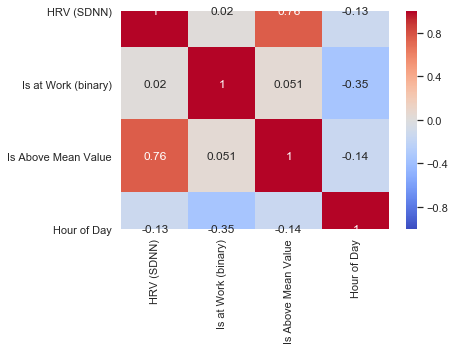

In [25]:
import seaborn as sns

hrv_merged.corr()

sns.set(style="whitegrid")
sns.heatmap(hrv_merged.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

hrv_merged.reset_index()
hrv_merged.head()

# sns.distplot(hrv_merged['HRV (SDNN)']);
# hrv_merged['HRV (SDNN)'].describe()

# sns.scatterplot(x="date", y="HRV (SDNN)",data=hrv_merged)


In [23]:
# from sklearn.metrics.pairwise import pairwise_distances

# jac_sim = 1 - pairwise_distances(hrv_merged.T, metric = "hamming")
# jac_sim = pd.DataFrame(jac_sim, index=hrv_merged.columns, columns=hrv_merged.columns)

# # sklearn.metrics.jaccard_score()

# jac_sim.head()

In [24]:
# results = results.reset_index()
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x=results['creationDate'], y=results['Flights Climbed'], data=results)
ax.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2019-12-31')))
for item in ax.get_xticklabels():
    item.set_rotation(45)
    


KeyError: 'creationDate'

<Figure size 720x720 with 0 Axes>

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
bx = sns.scatterplot(x=results['creationDate'], y=results['Step Count'], data=results, color='red')
bx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2019-12-31')))
for item in bx.get_xticklabels():
    item.set_rotation(45)

In [ ]:
plt.figure(figsize=(10,10))
cx = sns.scatterplot(x=results['creationDate'], y=results['Heart Rate Variability (SDNN)'], data=results, color='green')
cx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2019-12-31')))
for item in cx.get_xticklabels():
    item.set_rotation(45)

In [ ]:
plt.figure(figsize=(10,10))
dx = sns.scatterplot(x=results['creationDate'], y=results['Exercise Time (seconds)'], data=results, color='black')
dx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2019-12-31')))
for item in dx.get_xticklabels():
    item.set_rotation(45)

In [ ]:
sns.set(style="darkgrid")
# sns.set(rc={'figure.figsize':(16,13.27)}, font_scale=1.5)

# results = results.reset_index()
attributes = ['Step Count', 'Flights Climbed', 'Meditations (seconds)','Active Energy Burned (kcal)', 'Exercise Time (seconds)', 'Stand up number', 'Heart Rate Variability (SDNN)']

sns.set(style="whitegrid")
hx = sns.heatmap(results[attributes].dropna().corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

for item in hx.get_xticklabels():
    item.set_rotation(45)
    
for item in hx.get_yticklabels():
    item.set_rotation(45)

# results.dropna().corr()
df = results.dropna()

df

fig = hx.get_figure()
fig.savefig("../report/images/dataset_1_correlation.png")
# f = plt.figure(figsize=(19, 15))
# plt.matshow(df.corr(), fignum=f.number)
# plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
# plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

In [ ]:


# results=results.set_index('creationDate')
# results=results.reset_index()
attributes =['Step Count', 'Flights Climbed', 'Meditations (seconds)','Active Energy Burned (kcal)', 'Exercise Time (seconds)', 'Stand up number', 'Heart Rate Variability (SDNN)']


df_filtered_res = results[attributes].dropna()
# results.head()

df_filtered_res.head()


data_scaled = scaler.fit_transform(df_filtered_res)
# plt.xticks(results['creationDate'])

# data_scaled.min(axis=0)
df_standardized = pd.DataFrame(data_scaled)
df_standardized.columns = ['Step Count', 'Flights Climbed', 'Meditation Time','Active Energy Burned', 'Exercise Time', 'Stand Up Number', 'HRV']

# df_standardized.head()
rx = sns.scatterplot(data=df_standardized)
rx.set(xlabel='Observation day', ylabel='Standardized Value')

fig = rx.get_figure()
fig.savefig("../report/images/dataset_1_scatterplot.png")

df_standardized.describe()


# wx = df_standardized.hist()
# fig2 = wx.get_figure()
# fig2.savefig("../report/images/dataset_1_hist.png")



# sns.heatmap(standardized.corr(),
#             vmin=-1,
#             cmap='coolwarm',
#             annot=True);

# print(data_scaled.min(axis=0))




In [ ]:
fig, ax = plt.subplots()
df_standardized.hist(ax=ax)
fig.savefig("../report/images/dataset_1_hist.png")




In [ ]:
results.dropna().describe()

In [ ]:
# df_standardized.columns=  ['Step Count','Flights Climbed','Meditations (seconds)','Active Energy Burned (kcal)','Exercise Time (seconds)','Stand up number','Heart Rate Variability (SDNN)']
pd.options.display.float_format = '{:.2f}'.format
df_standardized.round(1)
df_standardized.head()

# PCA

In [ ]:
# standardize
df_standardized.head()


## features
features = ['Step Count', 'Flights Climbed', 'Meditation Time','Active Energy Burned', 'Exercise Time', 'Stand Up Number']
X = df_standardized.loc[:,features].values

## target
y = df_standardized.loc[:, ['HRV']].values


df_standardized.loc[:,features].head()


# results_nona.set_index('creationDate')
# results_nona.head()



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X)

df_principal = pd.DataFrame(data = principal_components
             , columns = [0,1])


# pca.explained_variance_, pca.components_, pca.get_covariance() 


# it's the pc directions
pca.components_

# fig 3.9
# give v1 and v2 (and vn...)
pca.explained_variance_ratio_.sum()

df_final = pd.concat([df_principal, results[['Heart Rate Variability (SDNN)']]], axis = 1)



# plt.scatter(principal_components[:, 0], principal_components[:, 1],
#             c=y, edgecolor='none', alpha=0.5,
#             cmap=plt.cm.get_cmap('Spectral', 10))
# plt.xlabel('component 1')
# plt.ylabel('component 2')
# plt.colorbar();

# df_standardized.head()

pcx = sns.scatterplot(x=df_principal[0], y=df_principal[1], size=df_final['Heart Rate Variability (SDNN)'], hue=df_final['Heart Rate Variability (SDNN)'],data=df_final)

# df_principal.max()

# df_final.head()

pcx.set(xlabel='Principal Component 0', ylabel='Principal Component 1')
# df_principal[0]

fig = pcx.get_figure()
fig.savefig("../report/images/dataset_1_data_projection.png")





In [ ]:
ndf= pd.DataFrame(np.transpose(pca.components_))

ndf.columns = ['Principal Component 0', 'Principal Component 1']
ndf.head()

print(tabulate(ndf, tablefmt="pipe", headers="keys"))




In [ ]:
import numpy as np

pca = PCA(n_components=7)
principal_components = pca.fit_transform(df_standardized)

sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)
# np.cumsum(pca.explained_variance_ratio_)

evx = sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
evx.set(xlabel = "Principal Component", ylabel = "Cumulative Explained Variance")
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

# df_standardized.head()

fig = evx.get_figure()
fig.savefig("../report/images/dataset_1_pca_explained_variance.png")

pca.explained_variance_ratio_.sum()


In [ ]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=2)

# svd.fit(X)  
# TruncatedSVD(algorithm='randomized', n_components=2)
# print(svd.explained_variance_ratio_)

# print(svd.explained_variance_ratio_.sum())  

# print(svd.singular_values_)


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)

X_tranformed = svd.fit_transform(df_standardized)

svd.explained_variance_

# svd.components_

# iris_transformed

# sns.scatterplot(x=iris_transformed, y=iris_data)
sns.scatterplot(x=X, y=y)



In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")


ax = sns.scatterplot(x="total_bill", y="tip", hue=tips['size'], style=tips['time'], data=tips)

tips.head()